<a href="https://colab.research.google.com/github/ThanhToan2002/BT/blob/main/Nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)

training_set=train_data.flow_from_directory('/content/drive/MyDrive/Nhandienkhuonmat/train',target_size=(150,150), batch_size=32, class_mode='categorical')

training_set.class_indices

Found 246 images belonging to 5 classes.


{'Khoi': 0, 'Ly': 1, 'Messi': 2, 'Thang': 3, 'Toan': 4}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [13]:
train=model.fit(training_set,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
8/8 [==============================] - 27s 3s/step - loss: 1.5146 - accuracy: 0.4959
Epoch 2/20
8/8 [==============================] - 26s 3s/step - loss: 0.3293 - accuracy: 0.9431
Epoch 3/20
8/8 [==============================] - 27s 3s/step - loss: 0.4350 - accuracy: 0.9065
Epoch 4/20
8/8 [==============================] - 25s 3s/step - loss: 0.1293 - accuracy: 0.9593
Epoch 5/20
8/8 [==============================] - 25s 3s/step - loss: 0.0587 - accuracy: 0.9837
Epoch 6/20
8/8 [==============================] - 25s 3s/step - loss: 0.0175 - accuracy: 0.9959
Epoch 7/20
8/8 [==============================] - 25s 3s/step - loss: 0.0089 - accuracy: 0.9959
Epoch 8/20
8/8 [==============================] - 26s 3s/step - loss: 0.0053 - accuracy: 1.0000
Epoch 9/20
8/8 [==============================] - 26s 3s/step - loss: 4.5660e-04 - accuracy: 1.0000
Epoch 10/20
8/8 [==============================] - 26s 3s/step - loss: 9.8198e-04 - accuracy: 1.0000
Epoch 11/20
8/8 [==============

In [14]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 5.526236418518238e-05
Train Accuracy 1.0


In [15]:
model.save("nhandienKHUONMAT(cnn).ipynb")

In [16]:
model_1=load_model('nhandienKHUONMAT(cnn).ipynb')

In [17]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
import matplotlib.pyplot as plt 

1/1 [==============================] - 0s 275ms/step
Khoi


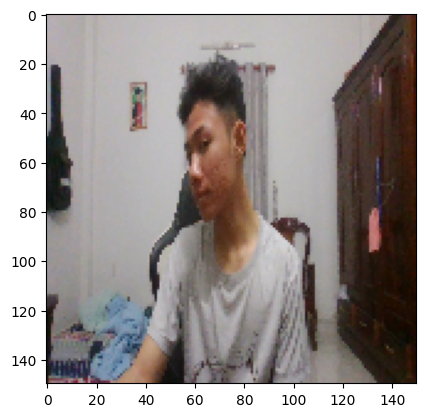

1/1 [==============================] - 0s 70ms/step
Messi


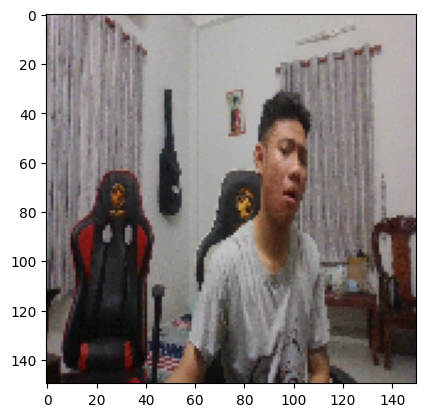

1/1 [==============================] - 0s 67ms/step
Khoi


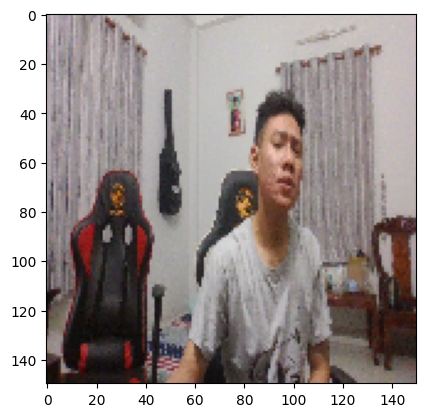

1/1 [==============================] - 0s 63ms/step
Thang


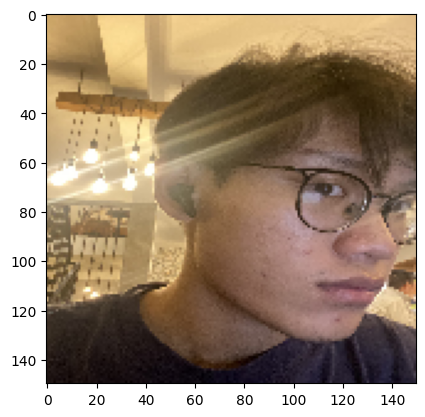

1/1 [==============================] - 0s 47ms/step
Thang


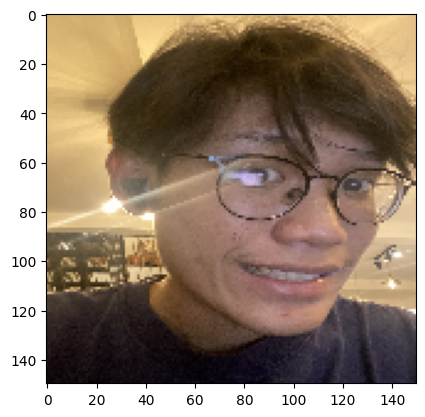

1/1 [==============================] - 0s 45ms/step
Thang


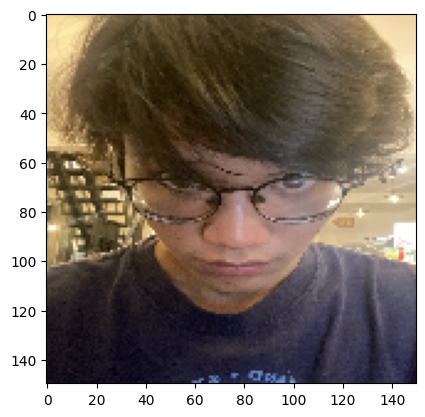

1/1 [==============================] - 0s 42ms/step
Toan


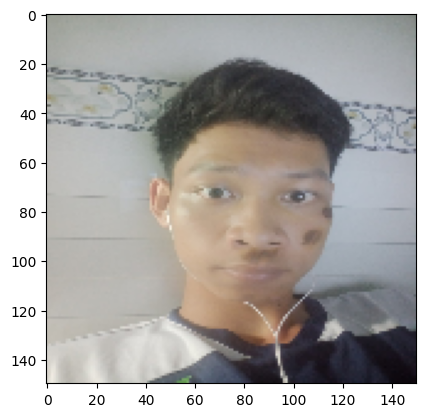

1/1 [==============================] - 0s 67ms/step
Toan


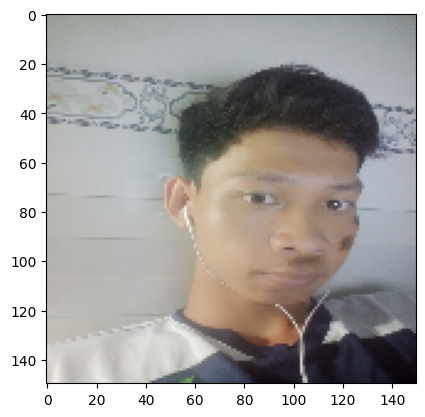

1/1 [==============================] - 0s 68ms/step
Toan


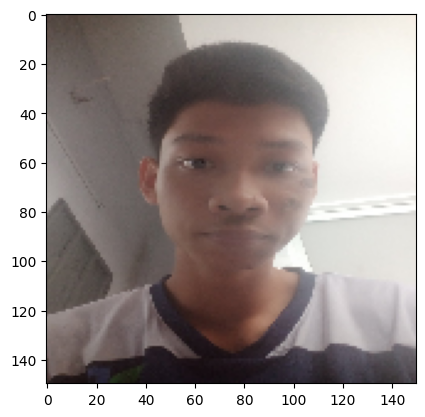

1/1 [==============================] - 0s 71ms/step
Messi


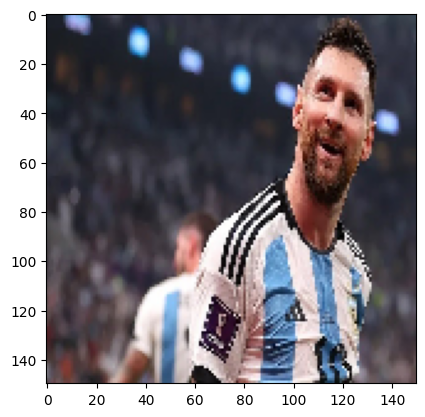

1/1 [==============================] - 0s 69ms/step
Messi


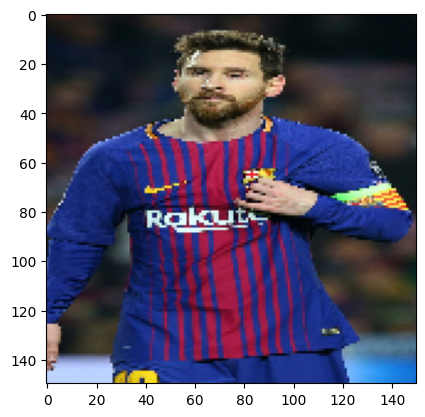

1/1 [==============================] - 0s 45ms/step
Messi


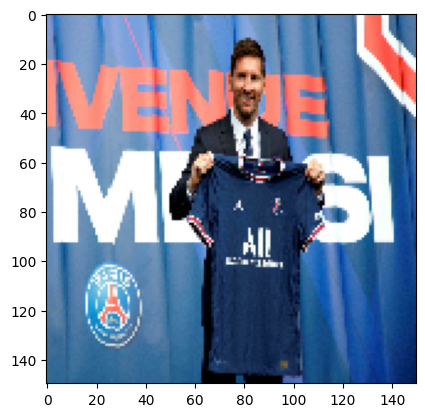

1/1 [==============================] - 0s 55ms/step
Ly


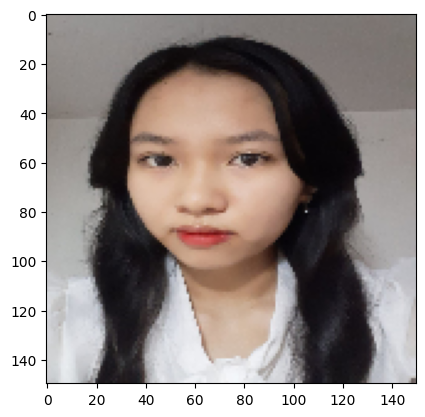

1/1 [==============================] - 0s 43ms/step
Ly


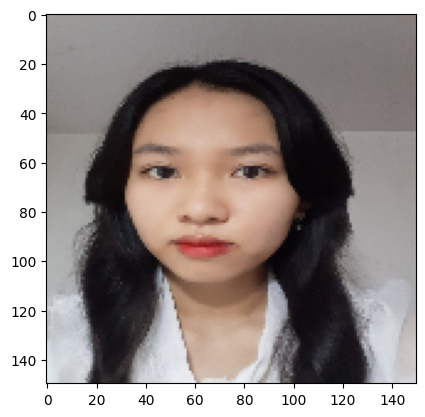

1/1 [==============================] - 0s 43ms/step
Ly


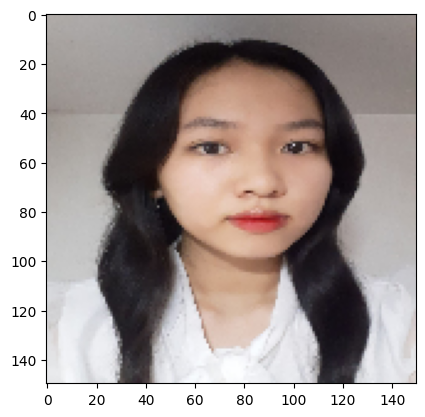

In [18]:
test='/content/drive/MyDrive/Nhandienkhuonmat/test'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Khoi','Ly','Messi','Thang','Toan']
  print(class_name[result]) 
  plt.show()